# Laborator 6 - Theodor Moroianu - 334

In [25]:
# importam modulele necesare
from dictlearn import DictionaryLearning
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from dictlearn import methods
import numpy as np
import numpy
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d

In [26]:
# constante
p = 8
s = 6
N = 1000
n = 256
K = 100
sigma = 0.075

### Exercitiul 1

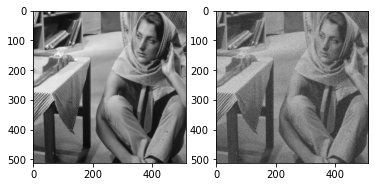

In [27]:
# 1.A 
I = plt.imread("barbara.png")

# 1.B
Inoisy = I + sigma * np.random.randn(*I.shape)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(I, cmap="gray")
ax[1].imshow(Inoisy, cmap="gray")
plt.show()

In [28]:
# 1.C
Ynoisy = extract_patches_2d(Inoisy, patch_size=(p, p))
Ynoisy = Ynoisy.reshape(Ynoisy.shape[0], -1)

Ynoisy_mean = np.mean(Ynoisy, axis=1).reshape((-1, 1))
Ynoisy -= Ynoisy_mean

Ynoisy = np.transpose(Ynoisy)
print(Ynoisy.shape)

# 1.D
Y = Ynoisy[:, numpy.random.choice(Ynoisy.shape[1],N)]
Y.shape

(64, 255025)


(64, 1000)

### Exercitiu 2

In [29]:
# 2.A
# Generam un dictionar random
D0 = np.random.randn(64, n)
D0 = normalize(D0, axis=0, norm='max')
print(D0.shape)

(64, 256)


In [30]:
# 2.B
dl = DictionaryLearning(
    n_components=n,
    max_iter=K,
    fit_algorithm='ksvd',
    n_nonzero_coefs=s,
    code_init=None,
    dict_init=D0,
    params=None,
    data_sklearn_compat=False
)
dl.fit(Y)
D = dl.D_

print(D.shape)

(64, 256)


### Exercitiu 3

In [31]:
# 3.A
Xc, err = methods.omp(Ynoisy, D, n_nonzero_coefs=s)

In [32]:
# 3.B
Yc = D.dot(Xc)
Yc += Ynoisy_mean.reshape((1, -1))
Yc.shape

(64, 255025)

In [33]:
# 3.C
Ic = reconstruct_from_patches_2d(Yc.transpose().reshape(-1, 8, 8), Inoisy.shape)

### Exercitiu 4

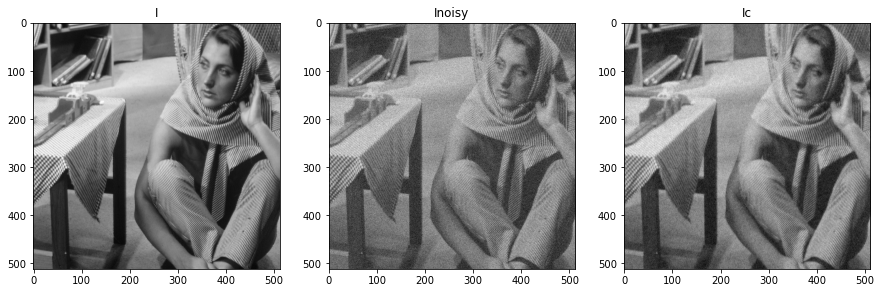

In [34]:
# 4.A
fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].set_title("I")
ax[0].imshow(I, cmap="gray")
ax[1].set_title("Inoisy")
ax[1].imshow(Inoisy, cmap="gray")
ax[2].set_title("Ic")
ax[2].imshow(Ic, cmap="gray")

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

In [35]:
# 4.B
# functia care calculeaza eficienta
def psnr(img1, img2):
    mse = numpy.mean((img1 - img2) ** 2)
    if(mse == 0):
        return 0
    max_pixel = 255
    psnr = 20 * numpy.log10(max_pixel / numpy.sqrt(mse))
    return psnr

print(f"psnr(I, Inoisy)={psnr(I, Inoisy)}, psnr(I, Ic)={psnr(I, Ic)}.")

psnr(I, Inoisy)=70.62299460848274, psnr(I, Ic)=74.98555474773087.
